# Chaotic motion of Double pendulum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])
from numpy import sin, cos, pi, sqrt

In [2]:
#Constants: 
m1 = 1; m2 = 2; l1 = 1; l2 = 1; g = 9.8

def RtoD(x): return 180*x/pi
def DtoR(x): return pi*x/180

#Initial conditions
ti = 0; tht1 = DtoR(0); tht2 = DtoR(0); w1 = 0; w2 = 2; tf = 5; h = 0.01

#empty list
THT1 = []; THT2 = []; tt = []; W1 = []; W2 = []; X1 = []; Y1 = [];X2 = []; Y2 =[]; KE1 = []; PE1 = []; KE2 = []; PE2 = []; KE = []; PE = []
E = []

#Diffarential equations
def Omega1(tht1, tht2, w1, w2):
    return (m2*g*l1*cos(tht1 - tht2)*sin(tht2) - m2*l1**2*cos(tht1 - tht2)*sin(tht1 - tht2)*w1**2 - m2*l1*l2*sin(tht1 - tht2)*w2**2 - g*(m1*l1 + m2*l2)*sin(tht1))/((m1 + m2)*l1**2 - m2*l1**2*(cos(tht1 - tht2))**2)
def Omega2(tht1, tht2, w1, w2):
    return ((m2**2/(m1+m2))*l2**2*cos(tht1 - tht2)*sin(tht1 - tht2)*w2**2 - (m2*l2*g*cos(tht1 - tht2)*sin(tht1)*(m1*l1 + m2*l2)/(l1*(m1+m2))) + m2*l1*l2*sin(tht1 - tht2)*w1**2 - m2*g*l2*sin(tht2))/(m2*l2**2 - m2**2*l2**2*(cos(tht1 - tht2)**2/(m1+m2)))

while (tf - ti) >= h:
    x1 = l1*sin(tht1)
    y1 = -l1*cos(tht1)
    x2 = l1*sin(tht1) + l2*sin(tht2)
    y2 = -(l1*cos(tht1) + l2*cos(tht2))
    dx1 = l1*cos(tht1)*w1
    dy1 = l1*sin(tht1)*w1
    v1 = dx1**2 + dy1**2  #actually it is velocity square we need that for kinetic energy
    dx2 = l1*cos(tht1)*w1 + l2*cos(tht2)*w2
    dy2 = l1*sin(tht1)*w1 + l2*sin(tht2)*w2
    v2 = dx2**2 + dy2**2
    
    #Appending :(
    
    tt.append(ti)
    THT1.append(RtoD(tht1))
    X1.append(x1)
    Y1.append(y1)
    THT2.append(RtoD(tht2))
    X2.append(x2)
    Y2.append(y2)
    W1.append(w1)
    W2.append(w2)
    KE1.append(0.5*m1*v1)
    PE1.append(m1*g*y1)
    KE2.append(0.5*m2*v2)
    PE2.append(m2*g*y2)
    KE.append(0.5*(m1*v1 + m2*v2))
    PE.append(g*(m1*y1 + m2*y2))
    
    E.append(0.5*(m1*v1 + m2*v2) + g*(m1*y1 + m2*y2))
    #Euler
    ti += h
    tht1 += h*w1
    tht2 += h*w2
    w1 += h*Omega1(tht1, tht2, w1, w2)
    w2 += h*Omega2(tht1, tht2, w1, w2)

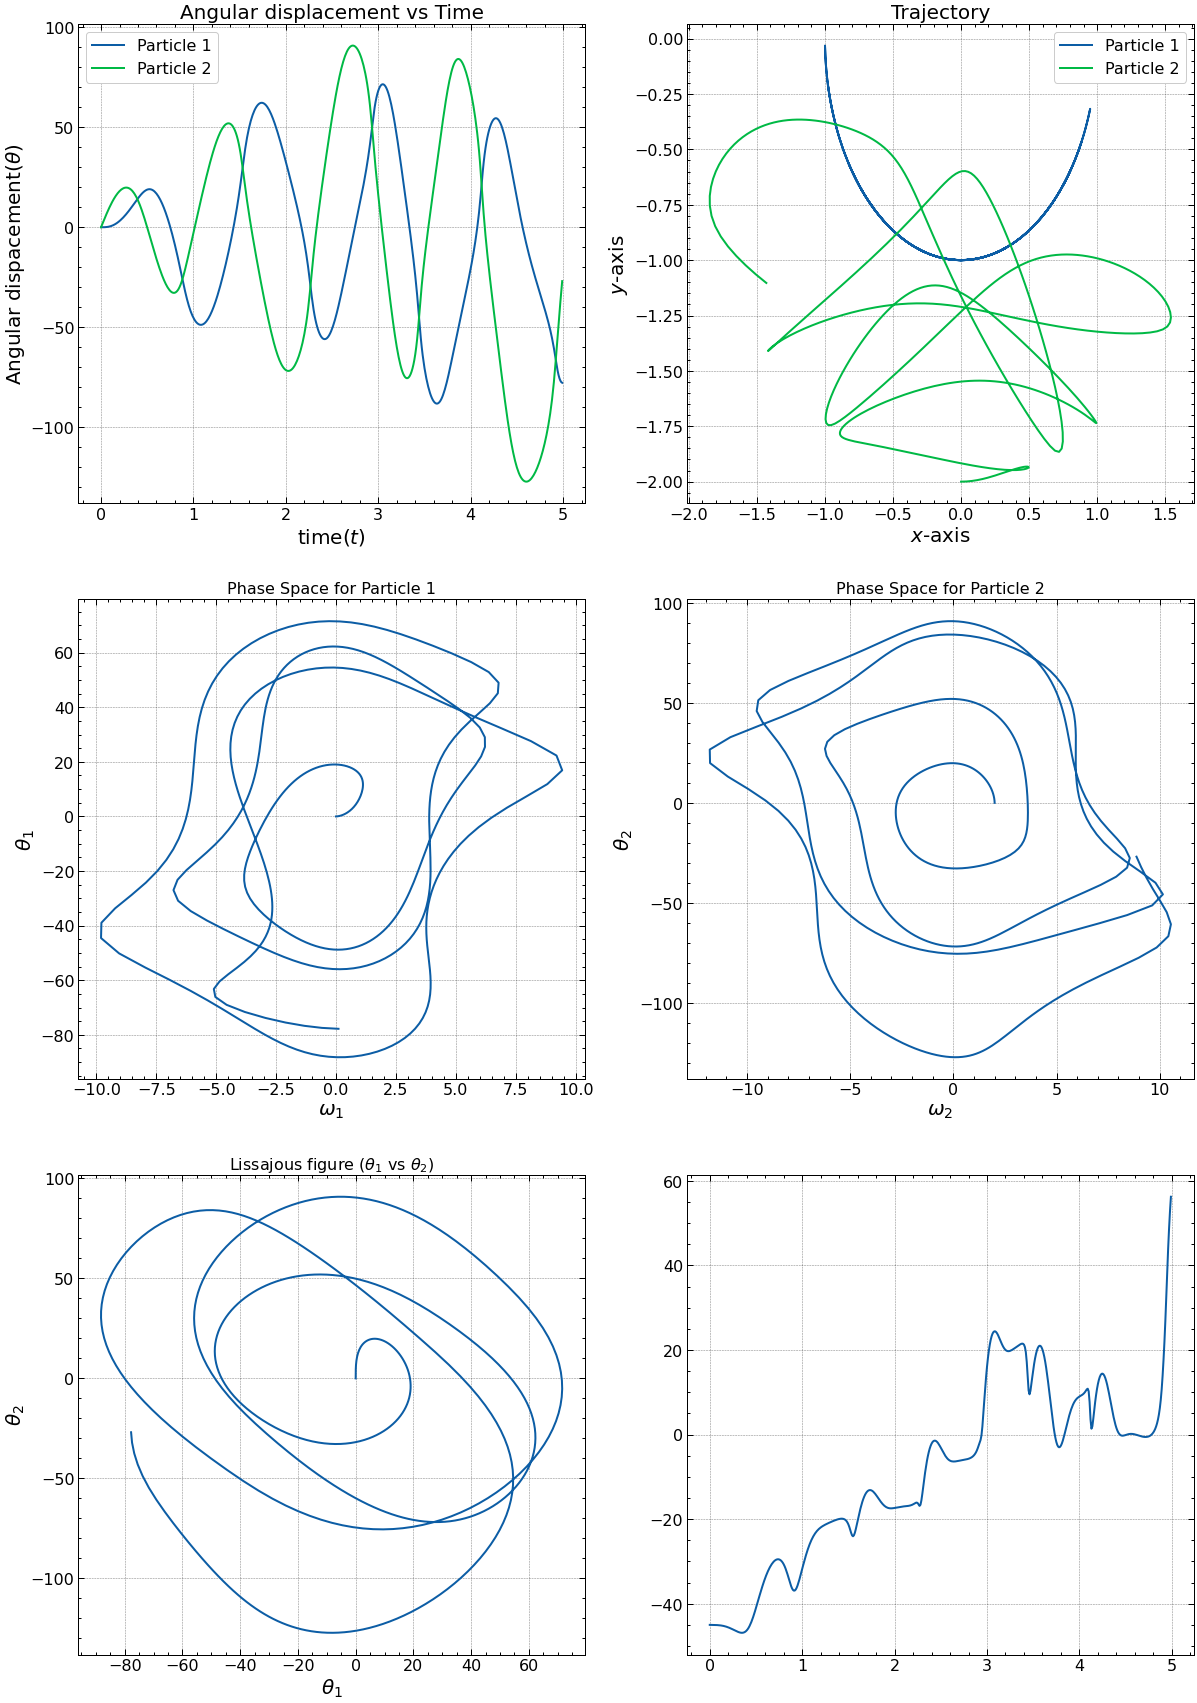

In [3]:
#Plotting
plt.figure(figsize=(20, 30))

plt.subplot(321)
plt.title("Angular displacement vs Time", size = 20)
plt.plot(tt, THT1, label = "Particle 1")
plt.plot(tt, THT2, label = "Particle 2")
plt.xlabel(r"time($t$)", size = 20)
plt.ylabel(r"Angular dispacement($\theta$)", size = 20)
plt.legend()

plt.subplot(322)
plt.title(r"Trajectory", size = 20)
plt.plot(X1, Y1, label = "Particle 1")
plt.plot(X2, Y2, label = "Particle 2")
plt.xlabel(r"$x$-axis", size = 20)
plt.ylabel(r"$y$-axis", size = 20)
plt.legend()

plt.subplot(323)
plt.title("Phase Space for Particle 1")
plt.plot(W1, THT1)
plt.xlabel(r"$\omega_1$", size = 20)
plt.ylabel(r"$\theta_1$", size = 20)

plt.subplot(324)
plt.title("Phase Space for Particle 2")
plt.plot(W2, THT2)
plt.xlabel(r"$\omega_2$", size = 20)
plt.ylabel(r"$\theta_2$", size = 20)


plt.subplot(325)
plt.title(r"Lissajous figure ($\theta_1$ vs $\theta_2$)")
plt.plot(THT1, THT2)
plt.xlabel(r"$\theta_1$", size = 20)
plt.ylabel(r"$\theta_2$", size = 20)

plt.subplot(326)
plt.plot(tt, E)

plt.show()